<a href="https://colab.research.google.com/github/Matasnet/Cena-Zlota/blob/main/Cena_z%C5%82ota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import bibliotek

In [1]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime, date



# Pobierz dane z API NBP

In [2]:
start_date = '2024-01-01'
end_date = date.today().strftime("%Y-%m-%d")
url = f'https://api.nbp.pl/api/cenyzlota/{start_date}/{end_date}/'
response = requests.get(url)
data = response.json()


# Przetwórz dane


In [3]:
dates = []
prices = []
for item in data:
    dates.append(datetime.strptime(item['data'], '%Y-%m-%d').date())
    prices.append(float(item['cena']))


# Tworzenie ramki danych pandas


In [4]:
df = pd.DataFrame({'Date': dates, 'Price': prices})

# Konwersja dat na liczby dni



In [5]:
start_date_num = df['Date'].min()
df['Days'] = (df['Date'] - start_date_num).dt.days



# Podziel dane na zestawy treningowy i testowy


In [6]:
X = df[['Days']].values
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Buduj model regresji liniowej


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 262.0840333240362
Coefficient: [-0.0294925]



# Przewidywanie cen złota


In [8]:
y_pred = model.predict(X_test)


# Ocena modelu


In [9]:
mse = mean_squared_error(y_test, y_pred)
print('Wartość błędu średniokwadratowego (MSE)', mse)

Wartość błędu średniokwadratowego (MSE) 2.560625047167713


# Wyświetlanie wykresu


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


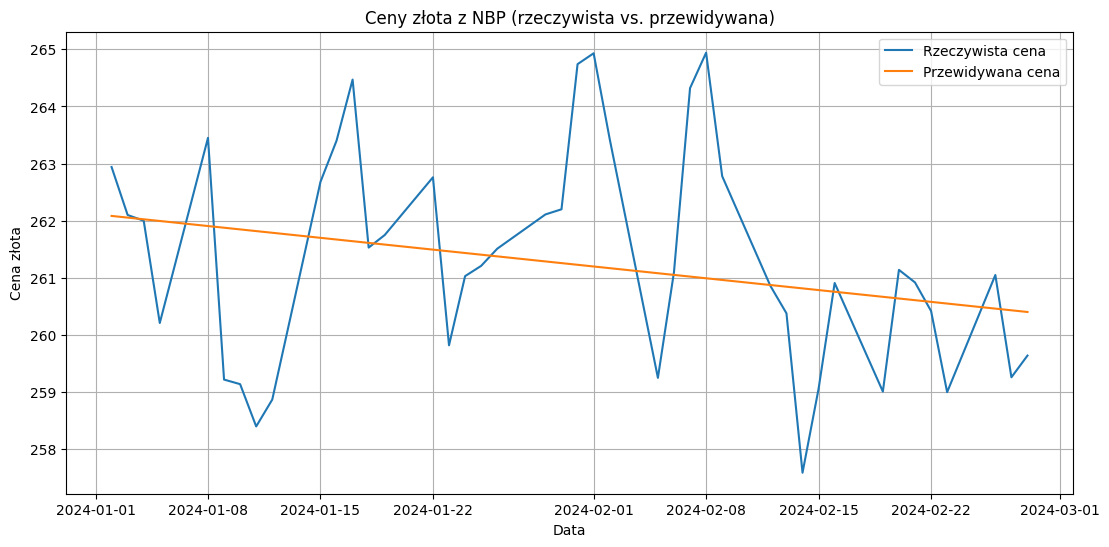

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))

plt.plot(df['Date'], df['Price'], label='Rzeczywista cena')

plt.plot(df['Date'], model.predict(df[['Days']]), label='Przewidywana cena')

plt.xlabel('Data')
plt.ylabel('Cena złota')
plt.title('Ceny złota z NBP (rzeczywista vs. przewidywana)')
plt.legend()
plt.grid(True)
plt.show()